In [1]:
# assign directory
import git
from pathlib import Path
import os
ROOT_DIR = Path(git.Repo('.', search_parent_directories=True).working_tree_dir)
os.chdir(os.path.join(ROOT_DIR, "utilities"))
# from transform import *
from transform_audio import *
# from plotting import *
os.chdir(os.path.join(ROOT_DIR, "dataset-preparation"))

data_dir  = os.path.join(ROOT_DIR, 'raw-data', 'ravdess', 'full-ravdess-wav-processed')
# iterate over files in that directory
file_list = [os.path.join(data_dir, filename) for filename in os.listdir(data_dir) if filename != ".DS_Store"]
file_names = os.listdir(data_dir)

In [4]:
transform_list(stft_file, file_list, file_names)

Computing and exporting coefficients:   0%|          | 0/1440 [00:00<?, ?it/s]

## Short-Time Fourier Transform

In [2]:
import numpy as np
import pywt
import matplotlib.pyplot as plt
from scipy.io import wavfile
import librosa

In [3]:
ravdess_df = pd.read_csv(os.path.join(ROOT_DIR, "raw-data", "ravdess", 'full-ravdess.csv'))

In [4]:
test_file_idx = 42
print(ravdess_df.iloc[test_file_idx])

signal, rate = librosa.load(file_list[test_file_idx], sr=None)

Unnamed: 0                                           42
modality                                     audio-only
channel                                          speech
emotion                                         neutral
intensity                                        normal
statement                  Kids are talking by the door
repetition                                            2
actor                                                19
sex                                                male
filename                       03-01-01-01-01-02-19.wav
length (s)                                        1.344
rate (Hz)                                         48000
amplitudes    [ 2012  1486   232 ... -6685 -6556 -7419]
Name: 42, dtype: object


In [5]:
S = librosa.stft(signal)
D = librosa.amplitude_to_db(np.abs(S), ref=np.max)

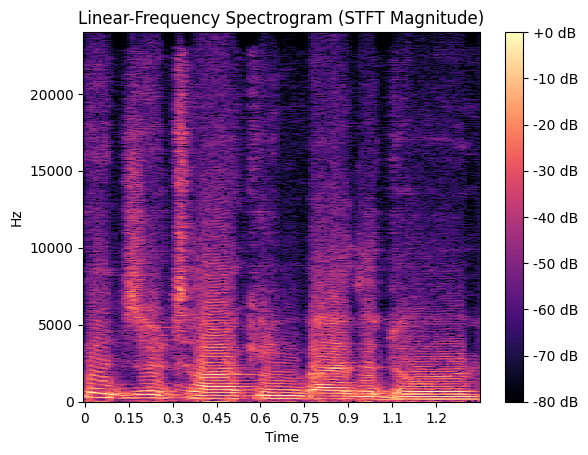

In [6]:
librosa.display.specshow(D, y_axis='linear', x_axis='time',sr=rate)
plt.colorbar(format="%+2.f dB")
plt.title('Linear-Frequency Spectrogram (STFT Magnitude)');

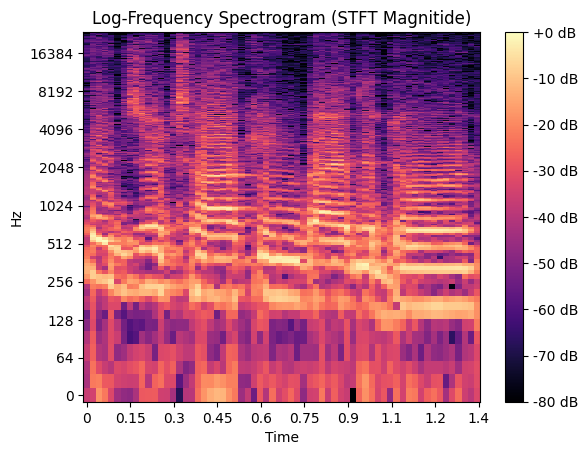

In [7]:
D_1024 = librosa.amplitude_to_db(np.abs(librosa.stft(signal, hop_length=1024)), ref=np.max)
librosa.display.specshow(D_1024, y_axis='log', sr=rate, x_axis='time', hop_length=1024)
plt.colorbar(format="%+2.f dB")
plt.title('Log-Frequency Spectrogram (STFT Magnitide)');

## Frequency band grouping

In [2]:
transform_dir = os.path.join(ROOT_DIR, 'raw-data', 'ravdess', 'ravdess-transforms')
coefs_npz_path = os.path.join(transform_dir, 'stft_coefs.npz')

In [4]:
bands_05 = freq_band_groupings(
    coefs_npz_path,
    ks_threshold=.05,
    cache=True
)

In [5]:
bands_05

[(0, 16),
 (16, 32),
 (32, 64),
 (64, 96),
 (96, 128),
 (128, 256),
 (256, 320),
 (320, 384),
 (384, 448),
 (448, 513)]

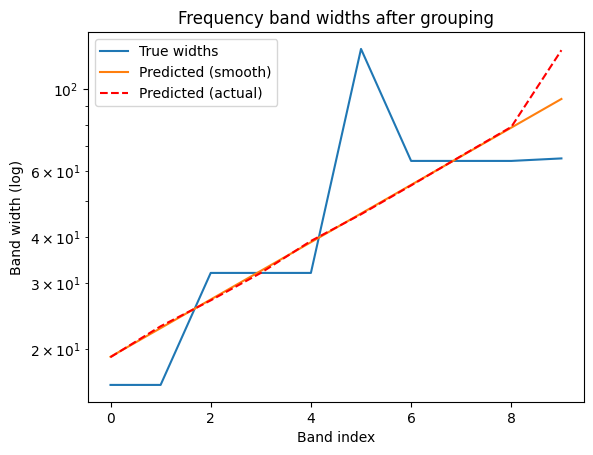

[(0, 19),
 (19, 42),
 (42, 69),
 (69, 101),
 (101, 140),
 (140, 186),
 (186, 241),
 (241, 307),
 (307, 386),
 (386, 513)]

In [6]:
geometric_width_bands(bands_05, visualize=True)

In [7]:
bands_025 = freq_band_groupings(
    coefs_npz_path,
    ks_threshold=.025,
    cache=True
)

In [8]:
bands_025

[(0, 1),
 (1, 2),
 (2, 3),
 (3, 4),
 (4, 5),
 (5, 6),
 (6, 8),
 (8, 12),
 (12, 14),
 (14, 16),
 (16, 24),
 (24, 32),
 (32, 40),
 (40, 48),
 (48, 64),
 (64, 80),
 (80, 96),
 (96, 128),
 (128, 256),
 (256, 288),
 (288, 320),
 (320, 352),
 (352, 384),
 (384, 448),
 (448, 464),
 (464, 480),
 (480, 513)]

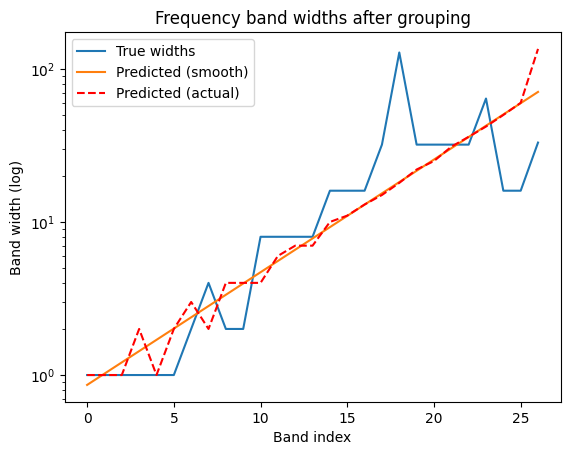

[(0, 1),
 (1, 2),
 (2, 3),
 (3, 5),
 (5, 6),
 (6, 8),
 (8, 11),
 (11, 13),
 (13, 17),
 (17, 21),
 (21, 25),
 (25, 31),
 (31, 38),
 (38, 45),
 (45, 55),
 (55, 66),
 (66, 79),
 (79, 94),
 (94, 112),
 (112, 134),
 (134, 159),
 (159, 190),
 (190, 226),
 (226, 268),
 (268, 318),
 (318, 378),
 (378, 513)]

In [9]:
geometric_width_bands(bands_025, visualize=True)